This notebook explains how to extract the data from the predictor raster variables to the point layer with landslide presence/absence points

In [2]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np

Setting up the directiry path

In [3]:
os.chdir(r'C:\Users\aageen17\Desktop\Variables')

Choosing all the predictors

In [4]:
predictors = ['dem_elevation.tif', 'TWI.tif', 'TPI.tif', 'TRI.tif', 'SPI.tif', 'easterness.tif', 'northerness.tif', 'profile_curvature.tif', 'slope_degrees.tif', 'slope_std.tif', 'roughness.tif', 'planform_curvature.tif', 'distance_coast.tif', 'distance_quarry.tif', 'distance_road.tif', 'distance_railroad.tif', 'distance_streams.tif', 'average_temp_ref.tif', 'average_wind_ref.tif', 'cloudburst_ref.tif', 'groundwater_ref.tif', 'rain_5_year_ref.tif', 'rain_50_year_ref.tif', 'rain_average_ref.tif', 'rain_max_14day_ref.tif', 'rain_max_day_ref.tif', 'soil.tif', 'geomorphology.tif', 'underground.tif', 'prequaternary.tif']

Making a raster stack of all the predictors. The predictors have the same extent, projection and resolution


In [5]:
stack = Raster(predictors)

Checking the bands in our stack


In [6]:
stack.names

dict_keys(['dem_elevation', 'TWI', 'TPI', 'TRI', 'SPI', 'easterness', 'northerness', 'profile_curvature', 'slope_degrees', 'slope_std', 'roughness', 'planform_curvature', 'distance_coast', 'distance_quarry', 'distance_road', 'distance_railroad', 'distance_streams', 'average_temp_ref', 'average_wind_ref', 'cloudburst_ref', 'groundwater_ref', 'rain_5_year_ref', 'rain_50_year_ref', 'rain_average_ref', 'rain_max_14day_ref', 'rain_max_day_ref', 'soil', 'geomorphology', 'underground', 'prequaternary'])

Reading the shapefile with landslide (centroids)/nonlandslide (randomly created) points and showing the first five rows

In [7]:
training_pt = geopandas.read_file(r'C:\Users\aageen17\Desktop\test_train_points_aoi\test_train_aoi.shp')
training_pt.head(5)

,class,geometry
0,1,POINT (553376.568 6170282.183)
1,1,POINT (553632.102 6170505.733)
2,1,POINT (553147.568 6170144.189)
3,1,POINT (552919.223 6170079.739)
4,1,POINT (552652.441 6169928.993)


Plotting the landslide/non-landslide points on the background of the DEM


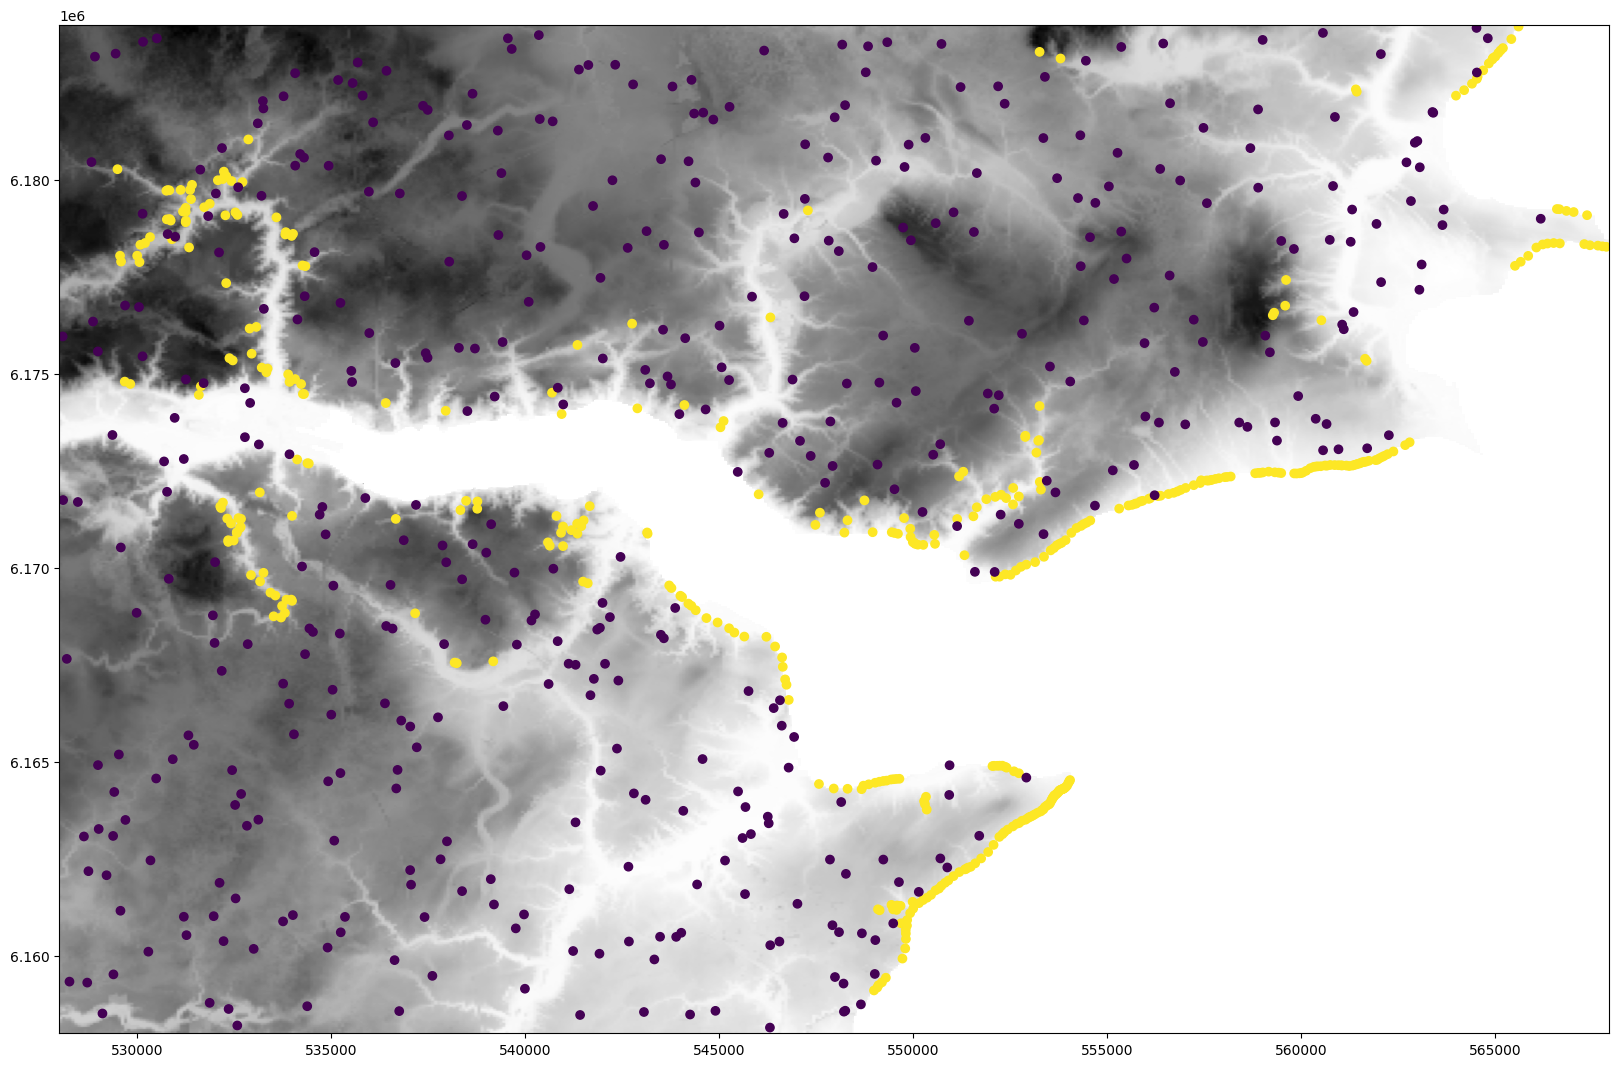

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
stack.dem_elevation.plot(ax=ax, cmap='Greys')
training_pt.plot(column="class", ax=ax)
plt.savefig(r'figure1.png', bbox_inches='tight', dpi=1300)
plt.show()

Extracting the predictor features from the raster stack to our points


In [10]:
df_points = stack.extract_vector(training_pt)

Showing the first five rows


In [11]:
df_points.head(5)

,,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,profile_curvature,slope_degrees,slope_std,...,rain_5_year_ref,rain_50_year_ref,rain_average_ref,rain_max_14day_ref,rain_max_day_ref,soil,geomorphology,underground,prequaternary,geometry
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,,,,
0,0,15.706318,4.440497,0.126874,0.173688,-1.667908,0.196570,-0.980490,-6.253337,2.642915,4.752529,...,43.898960,66.461922,2.006541,91.624649,33.681606,15.0,7.0,3.0,6.0,POINT (553376.568 6170282.183)
1,1,15.232349,3.427183,0.048178,0.395249,0.731700,0.575379,-0.817887,-1.694853,14.511214,3.343206,...,43.898960,66.461922,2.006541,91.624649,33.681606,15.0,7.0,3.0,6.0,POINT (553632.102 6170505.733)
2,2,17.030214,3.888671,-0.000931,0.361396,1.081142,0.634705,-0.772755,1.467297,13.748485,0.880331,...,43.898960,66.461922,2.006541,91.624649,33.681606,15.0,7.0,3.0,6.0,POINT (553147.568 6170144.189)
3,3,15.583941,4.675134,-0.030232,0.183543,0.294679,-0.788825,-0.614618,-2.029751,6.327752,3.459515,...,44.025265,66.691368,2.017731,91.936996,33.668327,15.0,7.0,3.0,6.0,POINT (552919.223 6170079.739)
4,4,17.499943,8.491714,0.150789,0.410609,5.817518,0.268115,-0.963387,-2.833697,14.660413,2.392220,...,44.125858,66.770096,2.021318,92.116493,33.706505,15.0,7.0,3.0,6.0,POINT (552652.441 6169928.993)


Merging the data frame back with the class

In [12]:
df_points = df_points.merge(
    right=training_pt.loc[:, ["class"]],
    left_on="geometry_idx",
    right_on="index",
    right_index=True
)

In [13]:
df_points.head(5)

,,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,profile_curvature,slope_degrees,slope_std,...,rain_50_year_ref,rain_average_ref,rain_max_14day_ref,rain_max_day_ref,soil,geomorphology,underground,prequaternary,geometry,class
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,,,,
0,0,15.706318,4.440497,0.126874,0.173688,-1.667908,0.196570,-0.980490,-6.253337,2.642915,4.752529,...,66.461922,2.006541,91.624649,33.681606,15.0,7.0,3.0,6.0,POINT (553376.568 6170282.183),1
1,1,15.232349,3.427183,0.048178,0.395249,0.731700,0.575379,-0.817887,-1.694853,14.511214,3.343206,...,66.461922,2.006541,91.624649,33.681606,15.0,7.0,3.0,6.0,POINT (553632.102 6170505.733),1
2,2,17.030214,3.888671,-0.000931,0.361396,1.081142,0.634705,-0.772755,1.467297,13.748485,0.880331,...,66.461922,2.006541,91.624649,33.681606,15.0,7.0,3.0,6.0,POINT (553147.568 6170144.189),1
3,3,15.583941,4.675134,-0.030232,0.183543,0.294679,-0.788825,-0.614618,-2.029751,6.327752,3.459515,...,66.691368,2.017731,91.936996,33.668327,15.0,7.0,3.0,6.0,POINT (552919.223 6170079.739),1
4,4,17.499943,8.491714,0.150789,0.410609,5.817518,0.268115,-0.963387,-2.833697,14.660413,2.392220,...,66.770096,2.021318,92.116493,33.706505,15.0,7.0,3.0,6.0,POINT (552652.441 6169928.993),1


Dropping the "Geometry" column


In [14]:
data= df_points.drop(columns=['geometry'])

Decribing the data

In [15]:
data.describe()

,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,profile_curvature,slope_degrees,slope_std,...,rain_5_year_ref,rain_50_year_ref,rain_average_ref,rain_max_14day_ref,rain_max_day_ref,soil,geomorphology,underground,prequaternary,class
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,...,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,36.904285,5.685200,-0.007074,0.290398,1.108998,0.126452,-0.187246,0.274577,9.842766,1.962083,...,44.451911,67.857623,2.093118,94.079242,33.759074,14.227373,6.727373,1.984547,6.477925,0.500000
std,28.037540,2.188128,0.113616,0.285938,2.194177,0.665740,0.711890,5.720942,9.343393,1.988085,...,0.793065,1.049635,0.120013,3.551623,0.206058,2.410190,1.607187,0.614542,1.249114,0.500276
min,-0.063328,1.392764,-0.590734,0.007468,-4.570874,-0.999999,-0.999999,-35.087368,0.090941,0.034482,...,43.132317,66.187889,1.897057,88.600052,33.206406,1.000000,1.000000,1.000000,2.000000,0.000000
25%,8.646569,4.082074,-0.032213,0.066225,-0.416696,-0.451637,-0.877404,-1.200416,2.289333,0.369370,...,43.649914,66.982368,2.004569,91.390388,33.640068,15.000000,7.000000,2.000000,6.000000,0.000000
50%,33.112755,5.254739,-0.001261,0.205904,1.099958,0.224183,-0.370327,0.072494,7.017459,1.410287,...,44.561981,67.804901,2.073241,93.511116,33.768017,15.000000,7.000000,2.000000,7.000000,0.500000
75%,61.300445,6.829001,0.024791,0.429368,2.347241,0.751924,0.508095,1.718757,14.793103,3.010567,...,45.071258,68.632818,2.210141,97.371338,33.871841,15.000000,7.000000,2.000000,7.000000,1.000000
max,101.406158,19.239317,0.551858,1.812488,11.650669,0.999996,0.999999,31.962004,49.638527,12.869604,...,46.414249,71.159210,2.304369,100.675308,34.549335,20.000000,10.000000,3.000000,9.000000,1.000000


Cheking the data types in the columns and missing values


In [16]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 906 entries, (0, 0) to (905, 905)
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dem_elevation       906 non-null    float64
 1   TWI                 906 non-null    float64
 2   TPI                 906 non-null    float64
 3   TRI                 906 non-null    float64
 4   SPI                 906 non-null    float64
 5   easterness          906 non-null    float64
 6   northerness         906 non-null    float64
 7   profile_curvature   906 non-null    float64
 8   slope_degrees       906 non-null    float64
 9   slope_std           906 non-null    float64
 10  roughness           906 non-null    float64
 11  planform_curvature  906 non-null    float64
 12  distance_coast      906 non-null    float64
 13  distance_quarry     906 non-null    float64
 14  distance_road       906 non-null    float64
 15  distance_railroad   906 non-null    f

Saving data as a .csv file for later use

In [17]:
data.to_csv('sample_points.csv', index = False)